# Predicting House Price 🏠

🎯 In this challenge, you will **predict the sale price** of houses (`SalePrice`) according to the *surface*, the *number of bedrooms* or the *overall quality*.

## Load Python Libraries

Run the cell below to `import` some Python libraries - these will be our tools for working with data 📊


In [17]:
import micropip
await micropip.install("seaborn")

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

--------------

## Load the Dataset

👇 Run the cell below to load the `house_prices.csv` dataset into this notebook as a pandas `DataFrame`, and display its first 5 rows.

*Note: the datasets has been cleaned and federated for learning purposes*

In [20]:
houses = pd.read_csv('House-price-prediction.csv')
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


This dataset contains information about houses sold.

The *columns* in the given dataset are as follows:

*Features:*
- `GrLivArea`: Surface in squared feet
- `BedroomAbvGr`: Number of bedrooms
- `KitchenAbvGr`: Number of kitchens
- `OverallQual`: Overall quality (1: Very Poor / 10: Very Excellent)

*Target:*
- `SalePrice`: Sale price in USD

--------------

## We can get a lot of insight without ML! 🤔

### Your turn! 🚀

Let's start by **understanding the data we have** - how big is the dataset, what is the information (columns) we have and so on:

**💡 Tip:** remember to check the slides for the right methods ;)

In [28]:
import pandas as pd

# Display the shape of the dataset, which was causing the error
print("--- Dataset Shape (Rows, Columns) ---")
print(df.shape)

# ... (rest of the analysis)

--- Dataset Shape (Rows, Columns) ---
(4600, 18)


Now try to **separate only some columns** - say we only want to see `SalePrice`, or `GrLivArea` and `BedroomAbvGr`:

In [31]:
import pandas as pd
# df = pd.read_csv("House-price-prediction.csv") # Assumed loaded

columns_to_select = ['price', 'sqft_living', 'bedrooms']
df_subset = df[columns_to_select]

# Display the first 10 rows of the selected columns using .to_string()
print(df_subset.head(10).to_string(index=False))

# Display the descriptive statistics using .to_string()
print(df_subset.describe().to_string())

    price  sqft_living  bedrooms
 313000.0         1340       3.0
2384000.0         3650       5.0
 342000.0         1930       3.0
 420000.0         2000       3.0
 550000.0         1940       4.0
 490000.0          880       2.0
 335000.0         1350       2.0
 482000.0         2710       4.0
 452500.0         2430       3.0
 640000.0         1520       4.0
              price   sqft_living     bedrooms
count  4.600000e+03   4600.000000  4600.000000
mean   5.519630e+05   2139.346957     3.400870
std    5.638347e+05    963.206916     0.908848
min    0.000000e+00    370.000000     0.000000
25%    3.228750e+05   1460.000000     3.000000
50%    4.609435e+05   1980.000000     3.000000
75%    6.549625e+05   2620.000000     4.000000
max    2.659000e+07  13540.000000     9.000000


-------

### Your turn - Now let's do some **visualization** 📊. 


Let's follow some basic intuition - **does the surface (`GrLivArea`) affects the price of the house(`SalePrice`)❓**

Let's use a [Seaborn Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) - a method inside the Seaborn library (which we imported above and shortened to `sns`) that gives us a graph with data points as dots with `x` and `y` values.

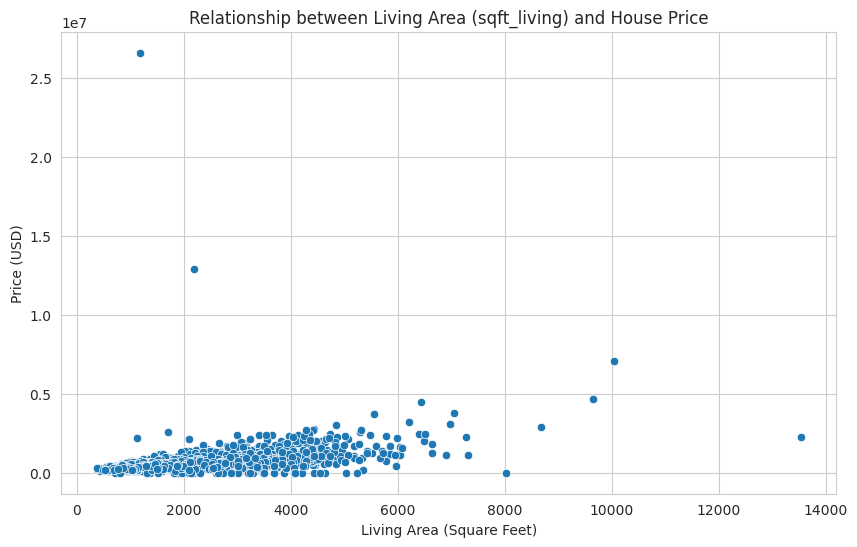

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is already loaded with your data

# Set style for better visualization
sns.set_style("whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='sqft_living',
    y='price',
    data=df
)

# Set titles and labels
plt.title('Relationship between Living Area (sqft_living) and House Price')
plt.xlabel('Living Area (Square Feet)')
plt.ylabel('Price (USD)')

# Save the plot to a file
plt.savefig('price_vs_sqft_living.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


Does the **overall quality (`OverallQual`) has an impact on the `SalePrice` ❓**

**💡Tip:** You can add a `hue` to the previous graph

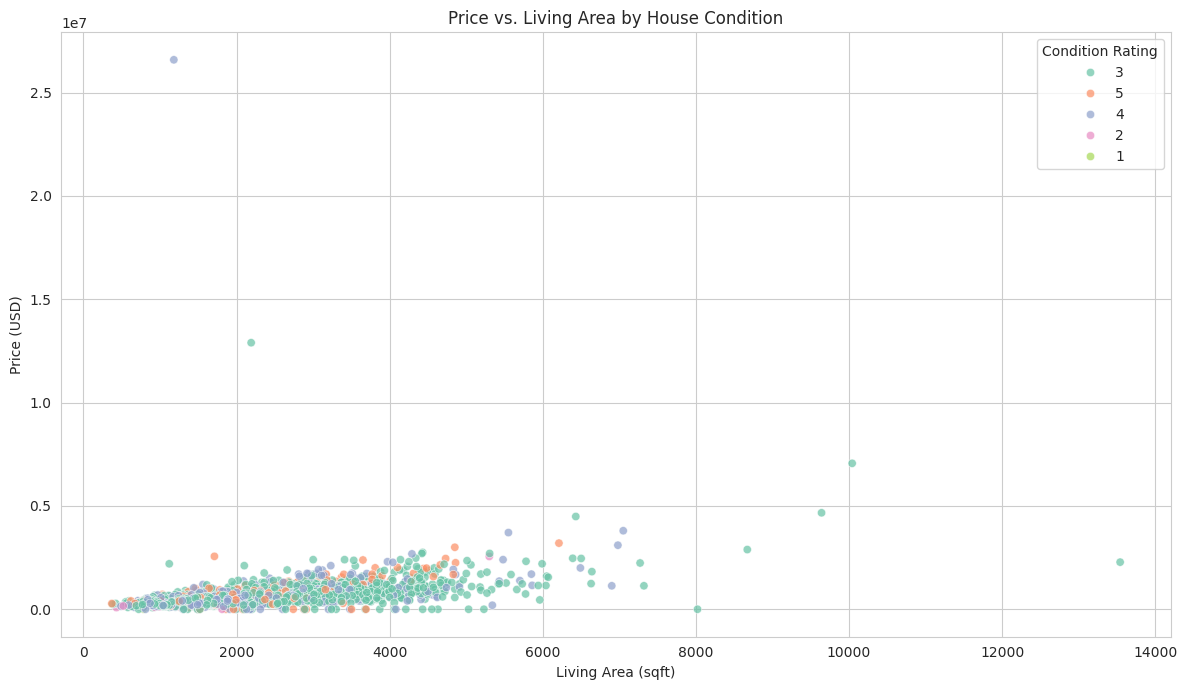

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is already loaded
quality_column = 'condition'
df[quality_column] = df[quality_column].astype(str)  # Treat as categorical

# Scatterplot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='sqft_living',
    y='price',
    hue=quality_column,
    data=df,
    palette='Set2',  # nicer for discrete categories
    alpha=0.7
)

# Titles and labels
plt.title('Price vs. Living Area by House Condition')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price (USD)')
plt.legend(title='Condition Rating')

plt.tight_layout()
plt.show()


Let's also understand the repartition we have for some features:

- **What is the repartition of the Number of bedrooms❓**
- **What is the repartition of the Number of kitchens❓**

Seaborn `countplot` is here to help with that.

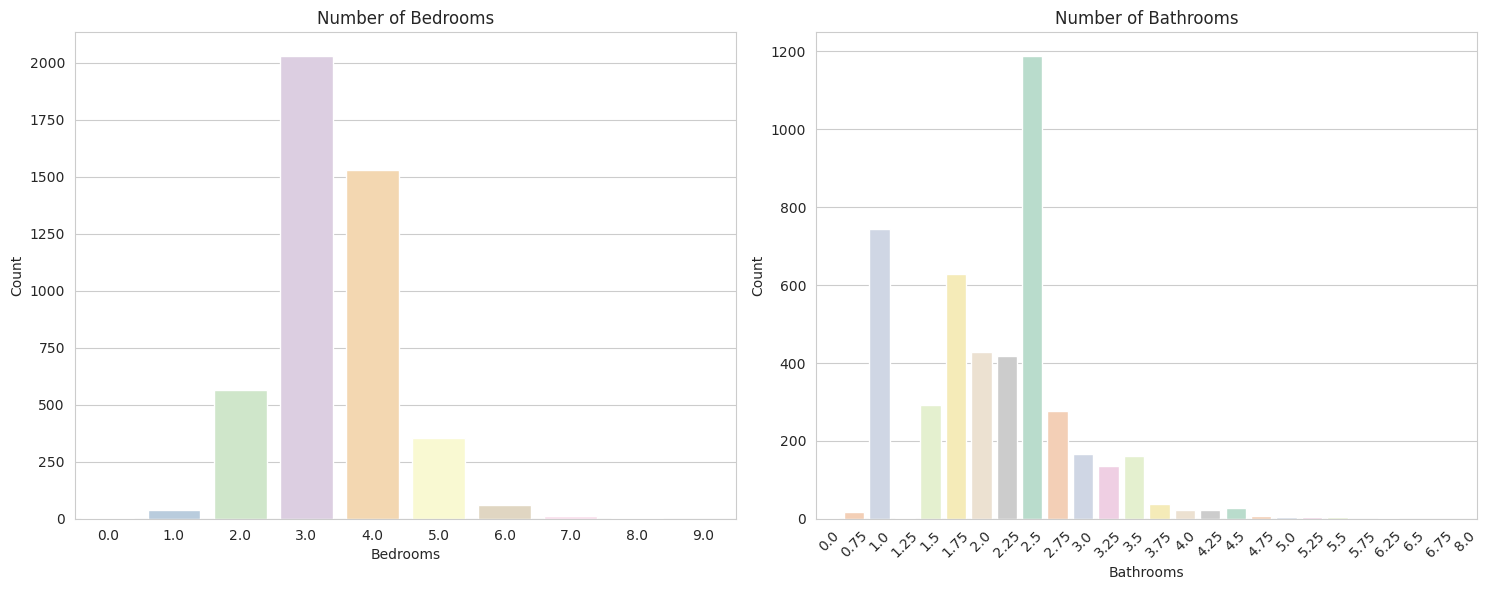

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is already loaded
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Bedrooms
sns.countplot(x='bedrooms', hue='bedrooms', data=df, ax=axes[0], palette='Pastel1', legend=False, order=sorted(df['bedrooms'].unique()))
axes[0].set_title('Number of Bedrooms'); axes[0].set_xlabel('Bedrooms'); axes[0].set_ylabel('Count')

# Plot 2: Bathrooms
sns.countplot(x='bathrooms', hue='bathrooms', data=df, ax=axes[1], palette='Pastel2', legend=False, order=sorted(df['bathrooms'].unique()))
axes[1].set_title('Number of Bathrooms'); axes[1].set_xlabel('Bathrooms'); axes[1].set_ylabel('Count'); axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


--------------

## Your first model - Linear Regression 📈

**1.** First, let's create what will be our features and our target.

Create a variable `features` containing all features:

In [32]:
# Display the column names
print("--- List of All Columns in the DataFrame ---")
print(df.columns.tolist())

import pandas as pd
from sklearn.model_selection import train_test_split  # Make sure this is included

# Load dataset
df = pd.read_csv("House-price-prediction.csv")

# Define features and target
X = df.drop(columns=['price', 'date', 'street', 'city', 'statezip', 'country'])
y = df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Print shapes
print("Training features:", X_train.shape)
print("Testing features: ", X_test.shape)
print("Training target:  ", y_train.shape)
print("Testing target:   ", y_test.shape)


--- List of All Columns in the DataFrame ---
['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']
Training features: (3680, 12)
Testing features:  (920, 12)
Training target:   (3680,)
Testing target:    (920,)


Create a variable `target` containing the target:

In [33]:
# Define the target variable
target = df['price']

# Optional: check the first few values
print(target.head())


0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64


Feel free to check what is in your `features` and `target` below:

In [5]:
import pandas as pd

# Load the dataset
file_name = "House-price-prediction.csv"
df = pd.read_csv(file_name)

# 1. Define FEATURES (X) - numerical columns excluding price, date, and address details
columns_to_drop = [
    'price', 
    'date', 
    'street', 
    'city', 
    'statezip', 
    'country'
]
features = df.drop(columns=columns_to_drop, axis=1)

# 2. Define TARGET (y) - the price column
target = df['price']

# Display the first few rows of FEATURES and TARGET
print("FEATURES (X):")
print(features.head())

print("\nTARGET (y):")
print(target.head())


FEATURES (X):
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.50         1340      7912     1.5           0     0   
1       5.0       2.50         3650      9050     2.0           0     4   
2       3.0       2.00         1930     11947     1.0           0     0   
3       3.0       2.25         2000      8030     1.0           0     0   
4       4.0       2.50         1940     10500     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0          3        1340              0      1955          2005  
1          5        3370            280      1921             0  
2          4        1930              0      1966             0  
3          4        1000           1000      1963             0  
4          4        1140            800      1976          1992  

TARGET (y):
0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64


--------------

**2.** Time to **import** the *sklearn* function to split our dataset into a train and a test set

Try to find the right function [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [7]:
# 1. Import the necessary function
from sklearn.model_selection import train_test_split

# 2. Perform the split
# X_train and y_train will have 80% of the data.
# X_test and y_test will have 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    train_size=0.8,         # 80% for training
    random_state=42         # Ensures the split is the same every time
)

--------------

**3.** Use this function to create **X_train, X_test, y_train, y_test**

🚨 Set `random_state=42` as an argument of the function.

In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'features' (X) and 'target' (y) are defined

# Use train_test_split with random_state=42 (default split is 75% train / 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    random_state=42
)

Let's check what is in your `X_train`, `X_test`, `y_train`, `y_test`:

- What percentage of the observations were allocated to the train and the test set?
- How many features in `X_train` and `X_test`?

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

print("Train %:", X_train.shape[0] / len(df) * 100)
print("Test %:", X_test.shape[0] / len(df) * 100)
print("Features:", X_train.shape[1])



Train %: 80.0
Test %: 20.0
Features: 12


--------------

**4.** Time to **import** the Linear Regression model

Python libraries like [Scikit-learn](https://scikit-learn.org/0.21/modules/classes.html) make it super easy for people getting into Data Science and ML to experiment.

The code is already in the library, it's just about **calling the right methods!** 🛠

In [9]:
from sklearn.linear_model import LinearRegression



Now to **initialize** the model. Store it in a variable `model`:

In [10]:

# Initialize the model
model = LinearRegression()


--------------

**5. Train** the model on the **training set**. 

This is the process where the Linear Regression model looks for a line that best fits all the points in the dataset. This is the part where the computer is hard at work **learning**! 🤖

In [11]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

--------------

**6. Evaluate** the performance of the model on the **test set**.

Models can have different default scoring metrics. Linear Regression by default uses something called `R-squared` - a metric that shows how much of change in the target (`SalePrice`) can be explained by the changes in features (`GrLivArea`, `BedroomAbvGr`, `KitchenAbvGr` and `OverallQual`)

In [12]:
# Evaluate the model
r2_score = model.score(X_test, y_test)

print("R-squared score on test set:", r2_score)


R-squared score on test set: 0.03228385663278133


⚠️ **Careful not to confuse this with accuracy**. The above number is shows that **"the inputs we have can help us predict this percentage of change in the depreciation"** Which is decent considering we did with just a few lines of code! 

Let's **compare** this score to the one the model gets on the **training set**:

In [13]:
# R-squared on training set
r2_train = model.score(X_train, y_train)

# R-squared on test set
r2_test = model.score(X_test, y_test)

print(f"R-squared on training set: {r2_train:.4f}")
print(f"R-squared on test set: {r2_test:.4f}")


R-squared on training set: 0.5442
R-squared on test set: 0.0323


👉 You should get a slightly higher score on the training set, which is to be expected in general.

The good news is that the 2 scores are relatively close to each other, which shows that we achieved a **good balance**, our model **generalises well to new observations**, explaining more than 70% of change in depreciation.

**Splitting the dataset into a training set and a test set is essential in Machine Learning**. It allows us to **identify**:
- **Overfitting**: we would see a large difference between the 2 scores. The model would be very good on the data it trained on, but would be doing poorly on the test set.
- **Underfitting**: we would have bad score on both the training data and on the test data. In this case, a reason could be that the model is not complex enough to capture the patterns in the data.

In our case, we have a **robust model** that does well on new observations💪. We can now use it to make predictions on new houses with confidence.

--------------

**7.** Let's **predict** the price of a new house 🔮

This new house has a the following characteristics:
- **Surface** of 3,000 squared feet
- 3 **bedrooms**
- 1 **kitchen**
- **Overall quality** score of 5

**7.1** Start by creating variable `new_house` in which you will store those characteristics. Make sure to use the right format to be able to make a prediction.

*Note: here is a reminder of the columns in the table:* `['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual']`


<details>
    <summary>💡Hint</summary>
<p> 
<pre>
`new_house` should be a `list of list`:
    [[surface, nb_bedrooms, nb_kitchens, overall_quality]]
</pre>
</details>

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Load the dataset
df = pd.read_csv("House-price-prediction.csv")

# 2. Select features and target
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'condition']]  # 4 simple features
y = df['price']

# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# 4. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Check model performance
print("R² on training set:", model.score(X_train, y_train))
print("R² on test set:", model.score(X_test, y_test))

# 6. Predict price of a new house
new_house = pd.DataFrame([[3000, 3, 1, 5]], columns=X.columns)
predicted_price = model.predict(new_house)
print("Predicted price:", predicted_price[0])



R² on training set: 0.48585959025966863
R² on test set: 0.03019941443847951
Predicted price: 913373.0457991434


**7.2** Now use the right method to make a prediction using the model we just trained:

In [22]:
import pandas as pd

# Create the new house as a DataFrame with the same columns as X
new_house = pd.DataFrame([[3000, 3, 1, 5]], columns=X.columns)

# Use the trained model to predict
predicted_price = model.predict(new_house)

print("Predicted price for the new house:", predicted_price[0])


Predicted price for the new house: 913373.0457991434


Now let's say we have another house with the same characteristics, except for the overall quality score being 9. 

**What would be the price of this house❓**

In [23]:
import pandas as pd

# Define the new house with condition = 9
new_house2 = pd.DataFrame([[3000, 3, 1, 9]], columns=X.columns)

# Predict the price
predicted_price2 = model.predict(new_house2)

print("Predicted price for the new house with condition 9:", predicted_price2[0])


Predicted price for the new house with condition 9: 1135727.298172016


--------------

**8.** **Explaining** the model

Linear Regression is a [linear model](https://scikit-learn.org/stable/modules/linear_model.html), so it's explainability is quite high.

**8.1.** We can check the `coef_` or the **coefficients** of the model. These explain how much the target (`SalePrice`) changes with a change of `1` in each of the features (inputs), while holding other features constant.

In [24]:
# Show feature coefficients
print("Feature coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# Show intercept
print("Intercept:", model.intercept_)


Feature coefficients:
sqft_living: 304.6181191559362
bedrooms: -67386.34610210797
bathrooms: 5896.930526217686
condition: 55588.56309321815
Intercept: -82162.01935464982


🤔 We'd need to check the column order again, to know which number is which input. But, **we got you covered!** Run the cell below:

In [26]:
import pandas as pd
import numpy as np

# Combine feature names and coefficients
pd.concat([pd.DataFrame(X.columns, columns=['Feature']),
           pd.DataFrame(np.transpose(model.coef_), columns=['Coefficient'])], axis=1)


,Feature,Coefficient
0,sqft_living,304.618119
1,bedrooms,-67386.346102
2,bathrooms,5896.930526
3,condition,55588.563093


**8.2** The other thing we can check is the **intercept** of the model. This is the target (`SalePrice`) for when all inputs are 0. So this should be close to a new house with a surface of 0 squared feet, no bedrooms, no kitchens and an overall quality of 0:

In [27]:
# Intercept of the model
print("Intercept (predicted price when all features are 0):", model.intercept_)


Intercept (predicted price when all features are 0): -82162.01935464982
